# Import Libraries & Dataset

In [138]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# 直接顯示圖形
%matplotlib inline

In [139]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [140]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [141]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [142]:
# 確認每個數值型欄位資訊
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


從資料來看 TotalCharges 應該是 float，但 type 卻顯示 object，所以可以來了解一下發生甚麼事

In [143]:
# 把 TotalCharges 欄位轉換為數值型態
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

這邊就明顯發現轉換過後其實是有11筆null，在做分析之前我們先處理一下

In [144]:
# 查看都是哪些類型的數據缺失
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: xlabel='TotalCharges', ylabel='Count'>

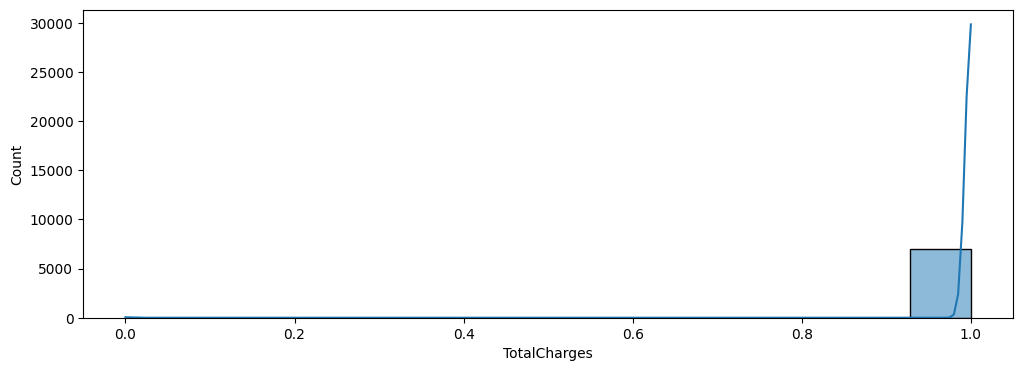

In [145]:
plt.figure(figsize = (12,4))
sns.histplot(df.TotalCharges.notnull().astype(float), kde=True)

透過數據以及圖示其實可以確認這11筆其實是極少數，我們就直接刪除這些數據

In [146]:
df = df[df.TotalCharges.notnull()]
df = df.reset_index()[df.columns]
df.info()
df.isnull().sum().values.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


0

In [147]:
# 確認數據分布、查看是否存在異常值，閥值設定為0.8
# 眾數與中位數之間的距離/四分位距離。這是一種用來衡量數據分佈不對稱性或偏斜度的方法
def check_bad_smell(df):
    # 計算每個欄位的第一四分位數(Q1)、中位數(median)、第三四分位數(Q3)
    error_event =abs((df.mode().iloc[0,] - df.median())/df.quantile(0.75) - df.quantile(0.25))
    problems = error_event[error_event>0.8]
    print(problems)
    return problems.index.tolist()
# SeniorCitizen tenure MonthlyCharges TotalCharges
bad_smell = check_bad_smell(df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])

tenure              9.509091
MonthlyCharges     36.147244
TotalCharges      401.812943
dtype: float64


<Axes: xlabel='TotalCharges', ylabel='Count'>

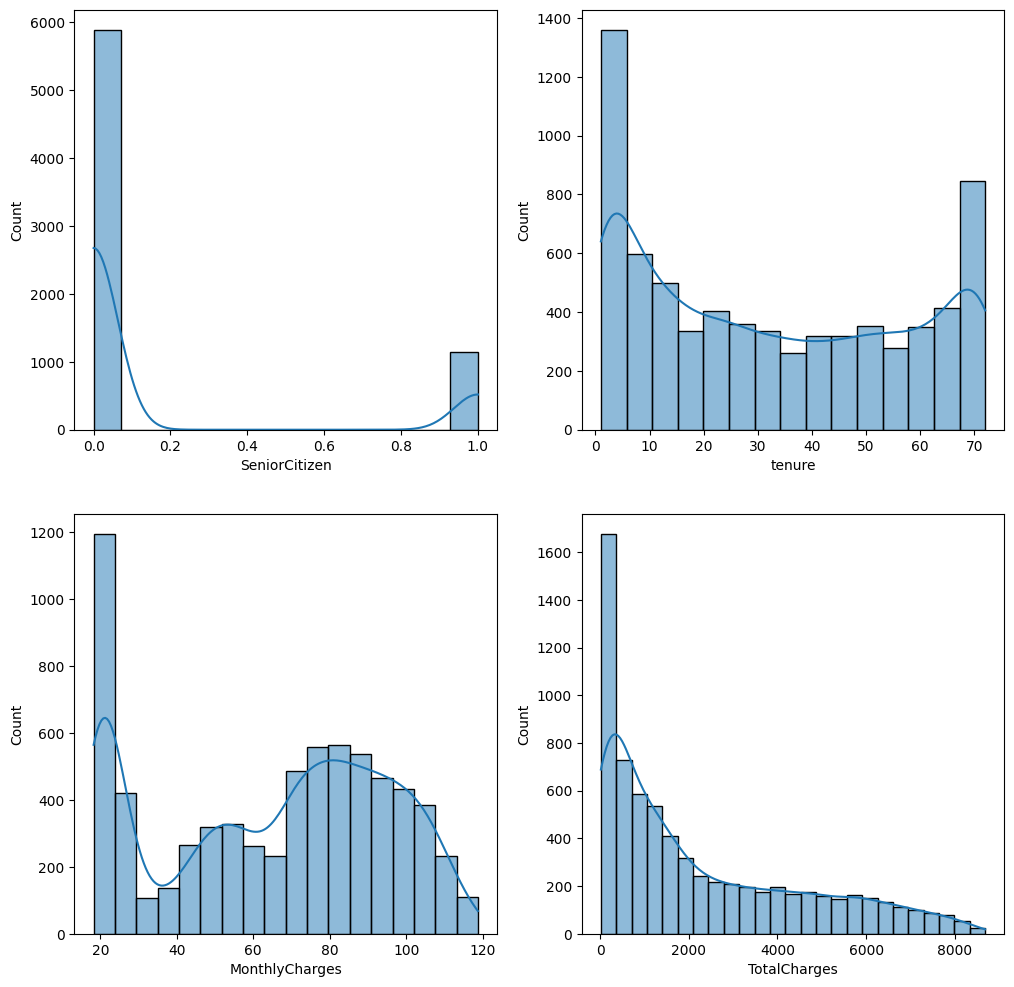

In [148]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(df['SeniorCitizen'], kde=True, ax=ax[0, 0])
sns.histplot(df['tenure'], kde=True, ax=ax[0, 1])
sns.histplot(df['MonthlyCharges'], kde=True, ax=ax[1, 0])
sns.histplot(df['TotalCharges'], kde=True, ax=ax[1, 1])

# Analysis Data

這份資料最重要的就是客戶的 Churn 流失狀況，所以接下來的分析都會以此為主軸來進行        

<Axes: ylabel='count'>

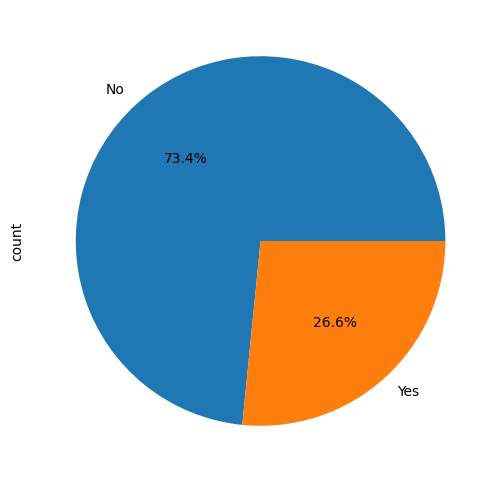

In [149]:
# Churn 比例 hue='Churn' palette='coolwarm'
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')


Text(0.5, 1.0, 'Churn vs TotalCharges')

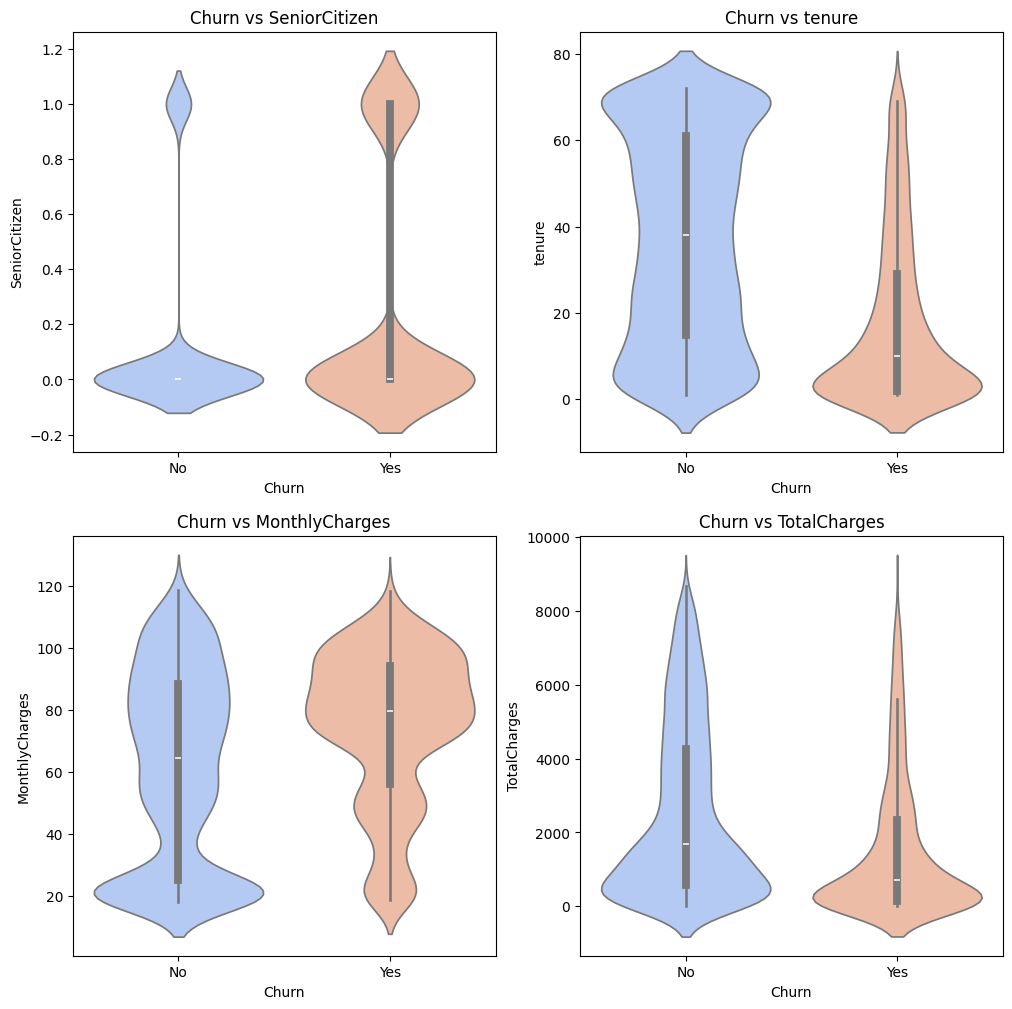

In [150]:
# vilinplot
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.violinplot(x='Churn', y='SeniorCitizen', data=df, ax=ax[0,0], hue='Churn', palette='coolwarm')
sns.violinplot(x='Churn', y='tenure', data=df, ax=ax[0,1], hue='Churn', palette='coolwarm')
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[1,0], hue='Churn', palette='coolwarm')
sns.violinplot(x='Churn', y='TotalCharges', data=df, ax=ax[1,1], hue='Churn', palette='coolwarm')
ax[0,0].set_title('Churn vs SeniorCitizen')
ax[0,1].set_title('Churn vs tenure')
ax[1,0].set_title('Churn vs MonthlyCharges')
ax[1,1].set_title('Churn vs TotalCharges')


<Axes: xlabel='Churn', ylabel='count'>

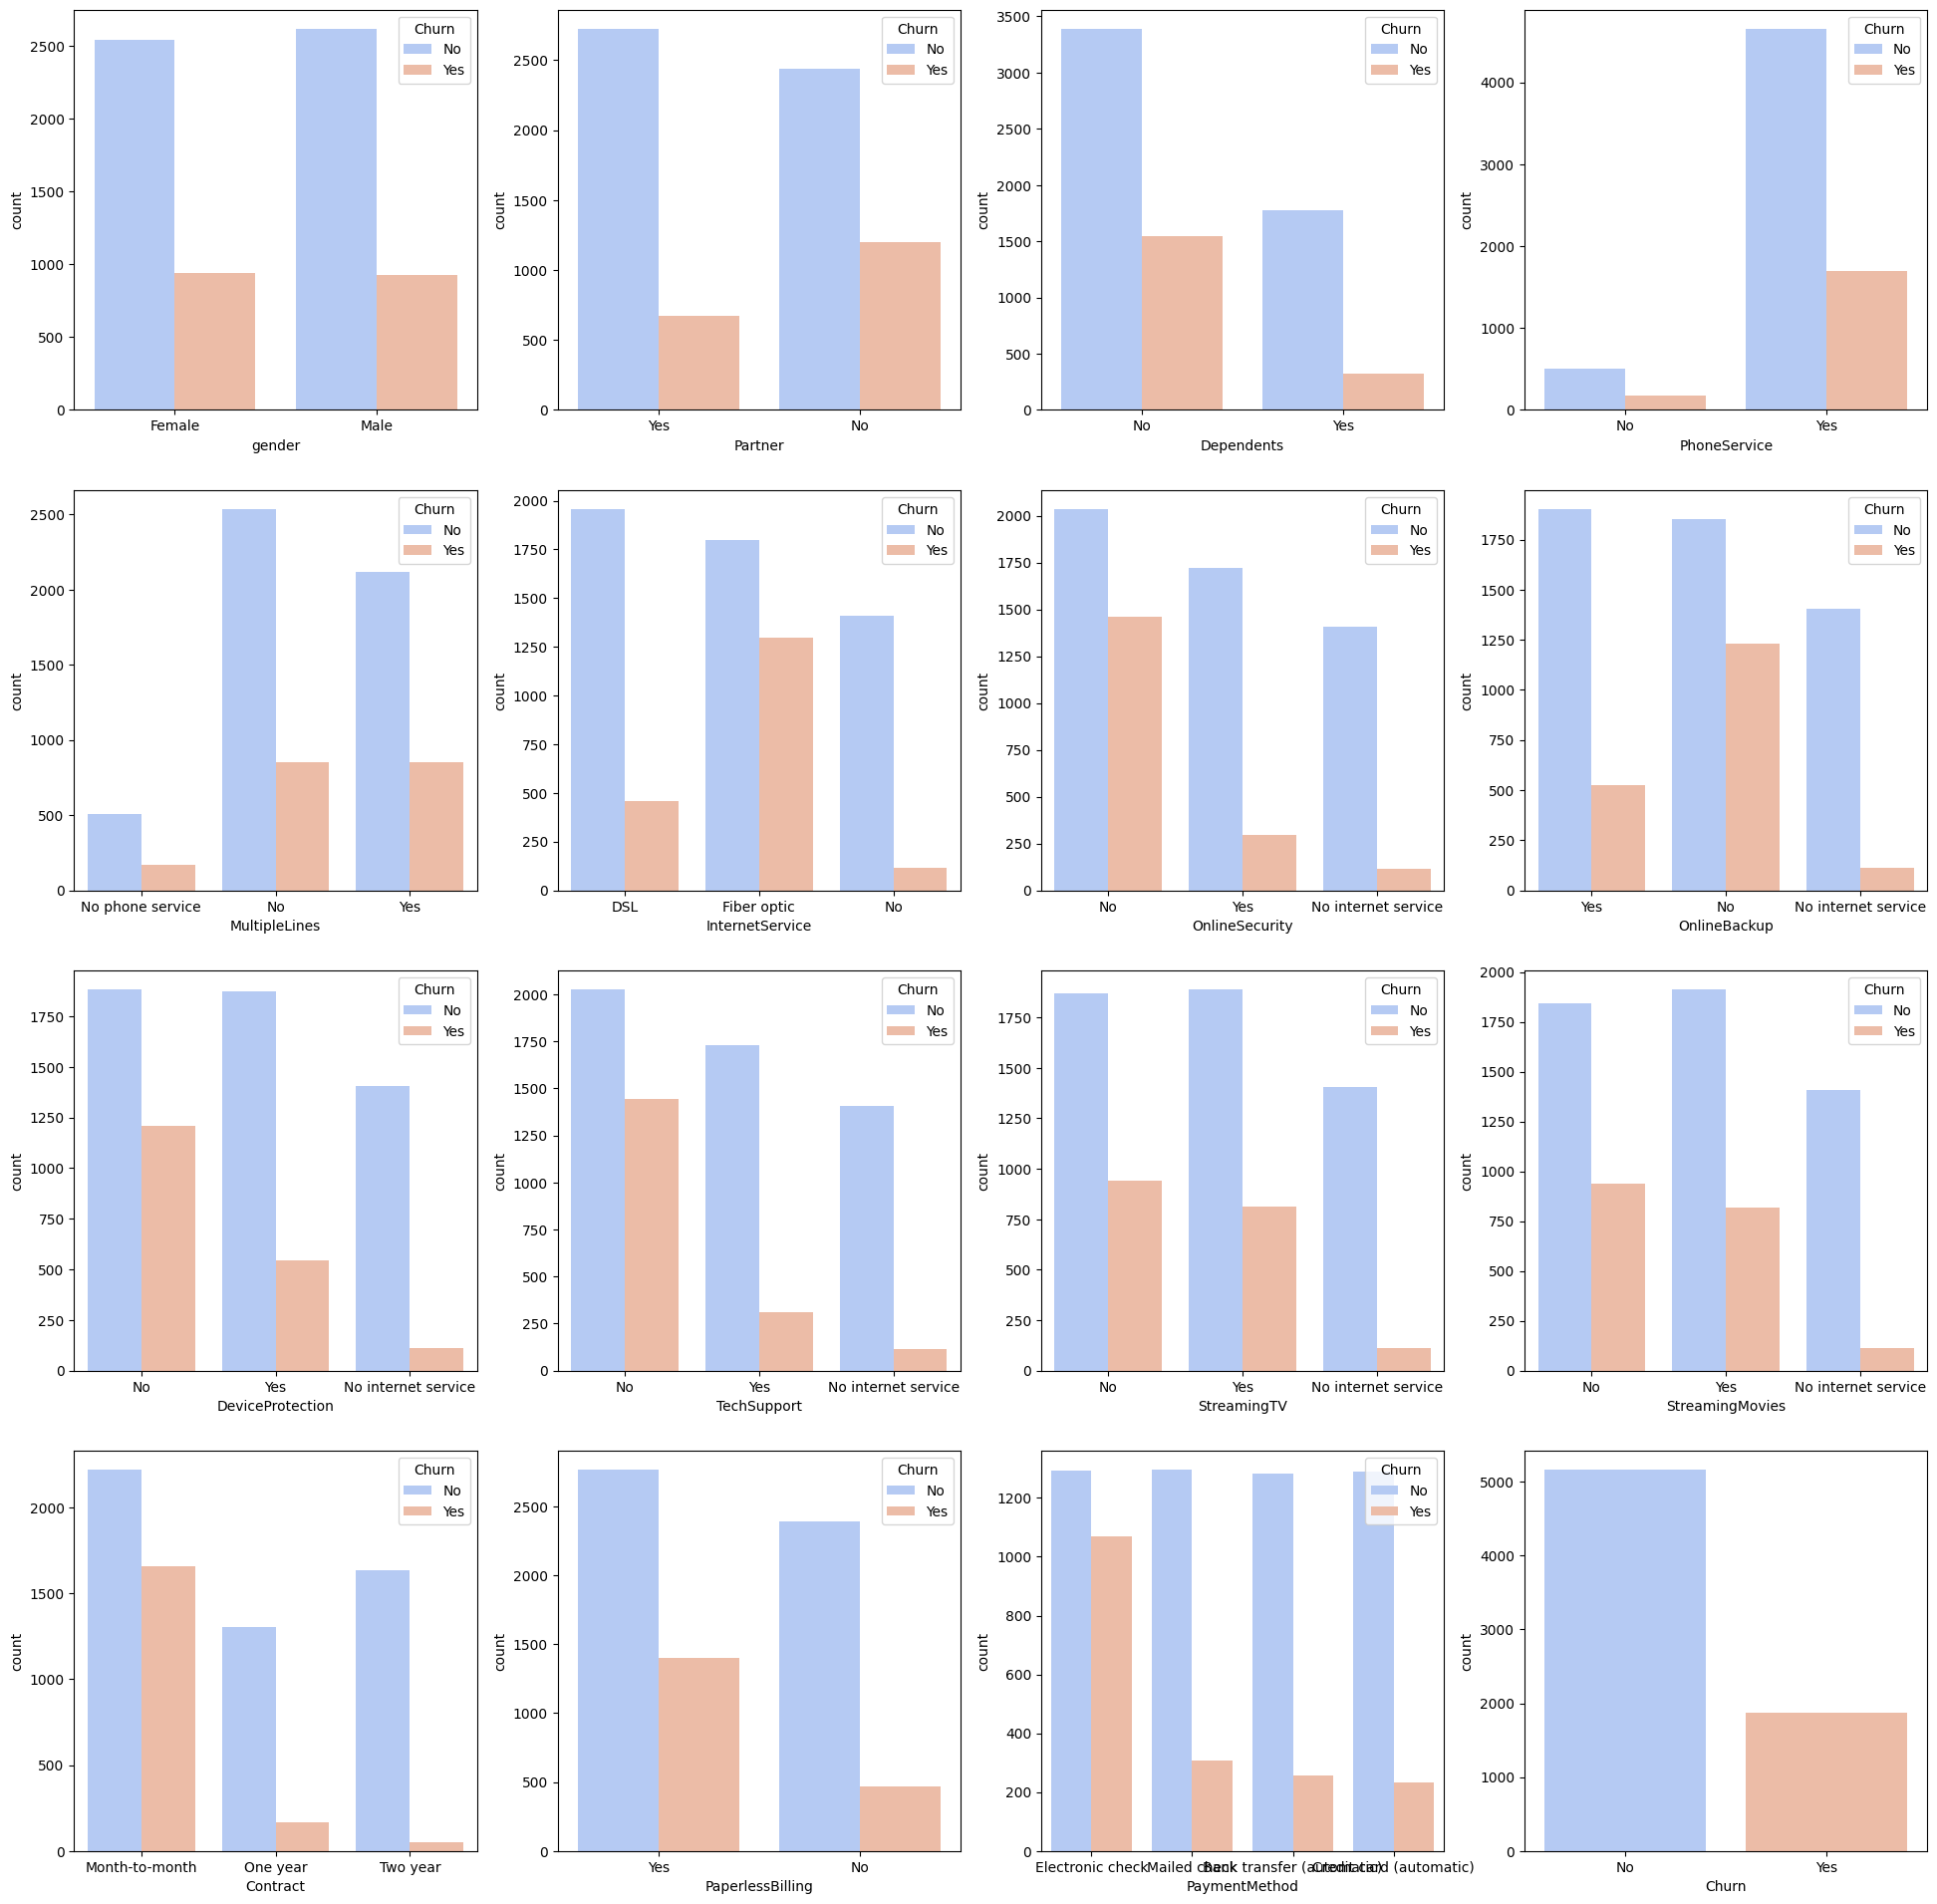

In [151]:
# 確認數據分布
fig, ax = plt.subplots(4, 4, figsize=(24, 24))
sns.countplot(data=df, x='gender', ax=ax[0, 0],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='Partner', ax=ax[0, 1],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='Dependents', ax=ax[0, 2],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='PhoneService', ax=ax[0, 3],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='MultipleLines', ax=ax[1, 0],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='InternetService', ax=ax[1, 1],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='OnlineSecurity', ax=ax[1, 2],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='OnlineBackup', ax=ax[1, 3],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='DeviceProtection', ax=ax[2, 0],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='TechSupport', ax=ax[2, 1],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='StreamingTV', ax=ax[2, 2],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='StreamingMovies', ax=ax[2, 3],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='Contract', ax=ax[3, 0],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='PaperlessBilling', ax=ax[3, 1],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='PaymentMethod', ax=ax[3, 2],hue='Churn', palette='coolwarm')
sns.countplot(data=df, x='Churn', ax=ax[3, 3],hue='Churn', palette='coolwarm')

In [152]:
df.drop(['customerID'], axis=1, inplace=True)

In [153]:
# 複製一份新的數據集，然後將類別型數據轉換為數值型數據
df_copy = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_copy.select_dtypes('object').columns:
    df_copy[col] = le.fit_transform(df_copy[col])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


<Axes: >

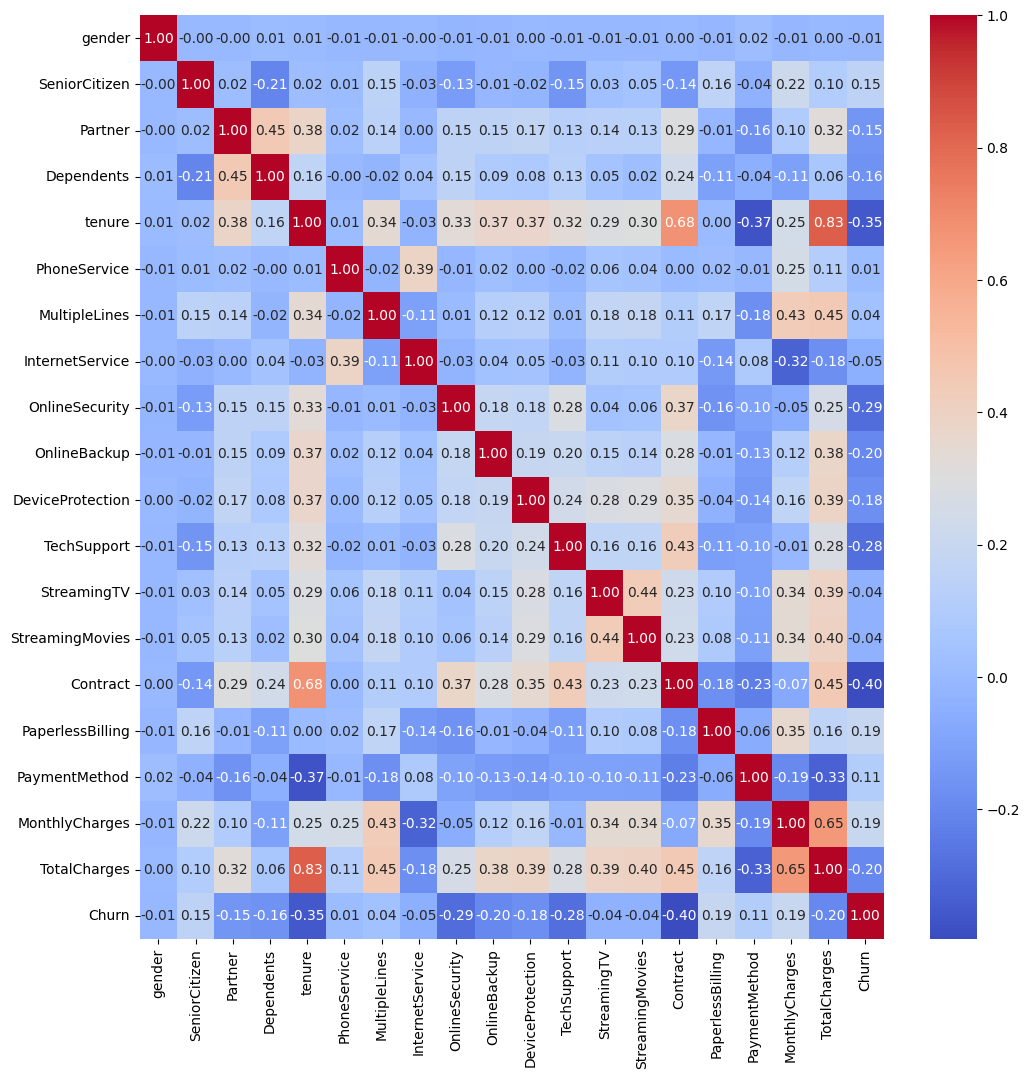

In [154]:
# heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [155]:
# 濾出heatmap中與Churn相關係數絕對值大於0.1的欄位
corr = df_copy.corr()
corr_churn = corr['Churn'].sort_values(ascending=False)
corr_churn = corr_churn[abs(corr_churn) > 0.3]
corr_churn

Churn       1.000000
tenure     -0.354049
Contract   -0.396150
Name: Churn, dtype: float64

從流失比例來看約1:3，相較於其他資料集來說相當不錯的分布了，若是後面需要進行模型預測時可以再處理這不平衡資料，

從 heatmap 圖其實可以明顯看到有些欄位的結果跟是否留存有蠻大的關係，尤其是 tenure 以及 Contract 這兩個欄位跟 Churn 有極大的關聯

從 violin 圖可以得知在 MonthlyCharges 和 tenure 的 Churn 分布上也有明顯的不一樣，在 Churn = Yes 時，tenure 的數值分布較低，MonthlyCharges 的則是較高

## 非數值型態分布

非數值型態的欄位可以用圓餅圖來看，可以了解在不同churn的情況下的佔比

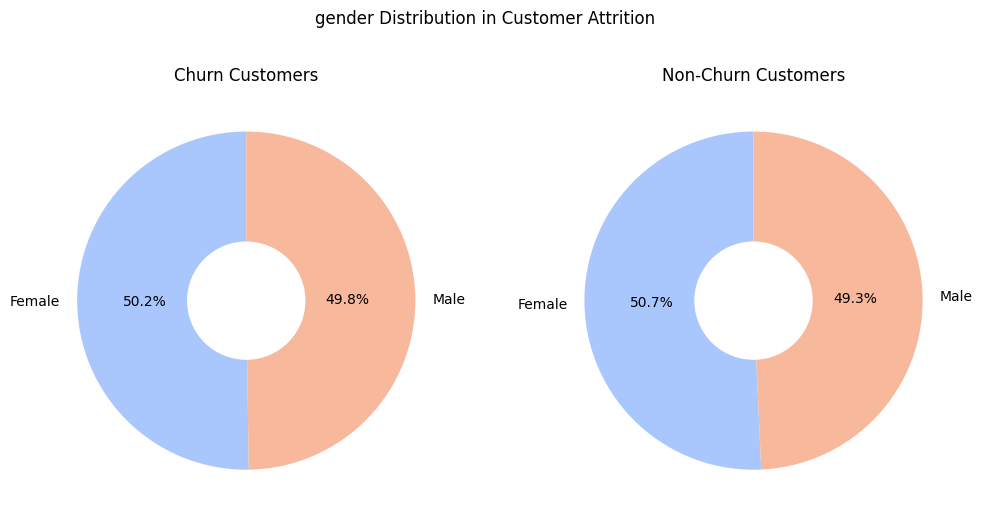

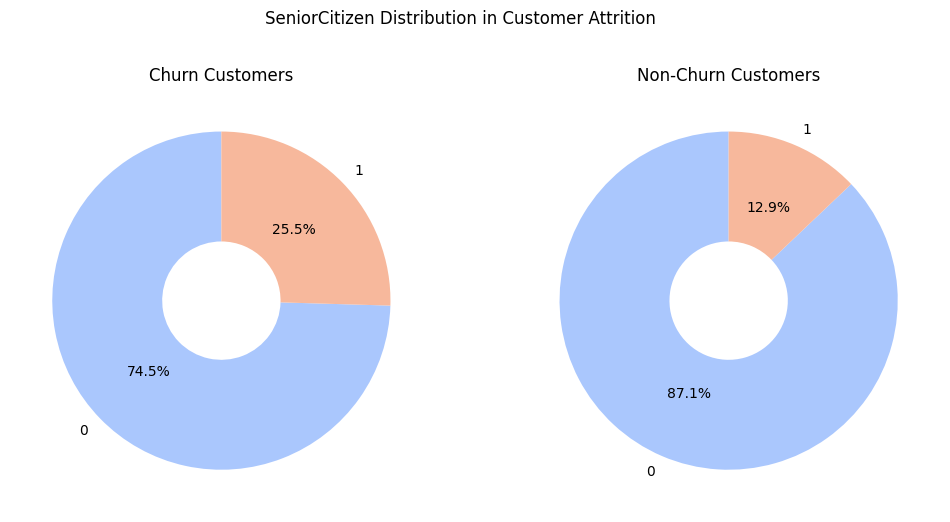

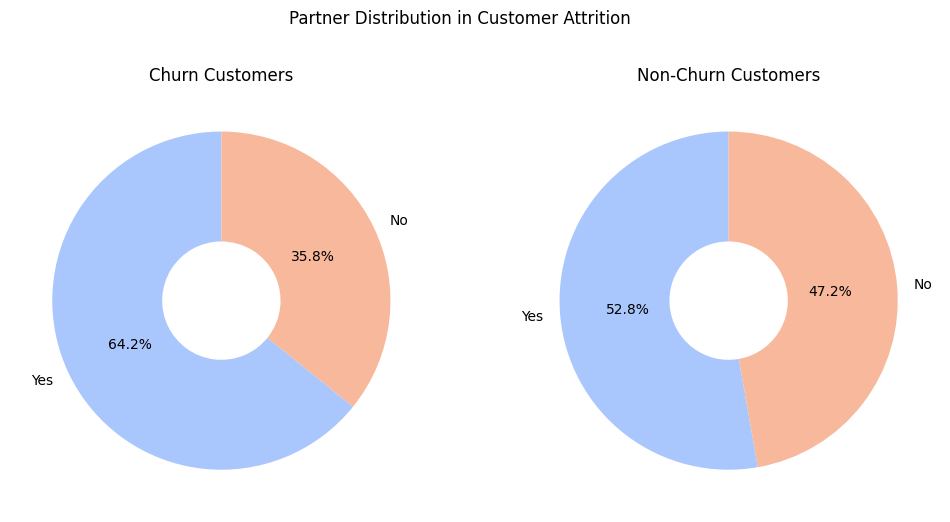

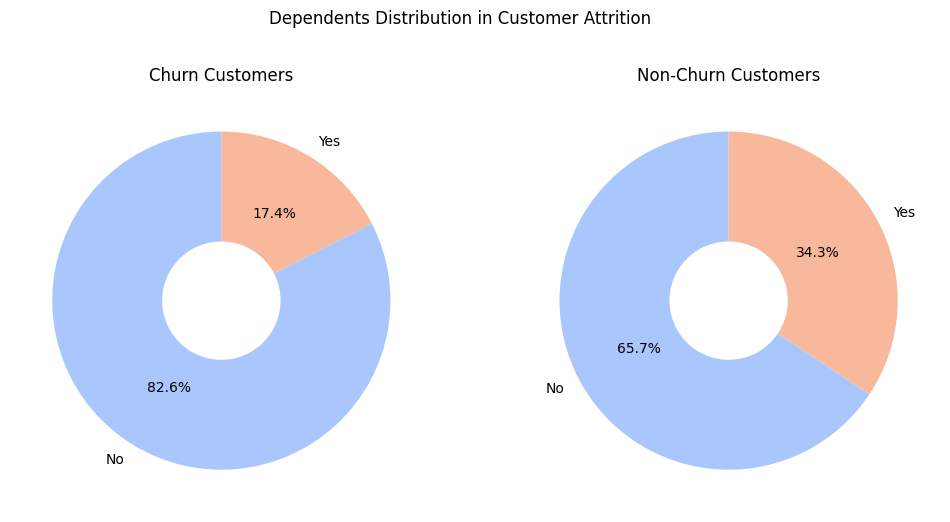

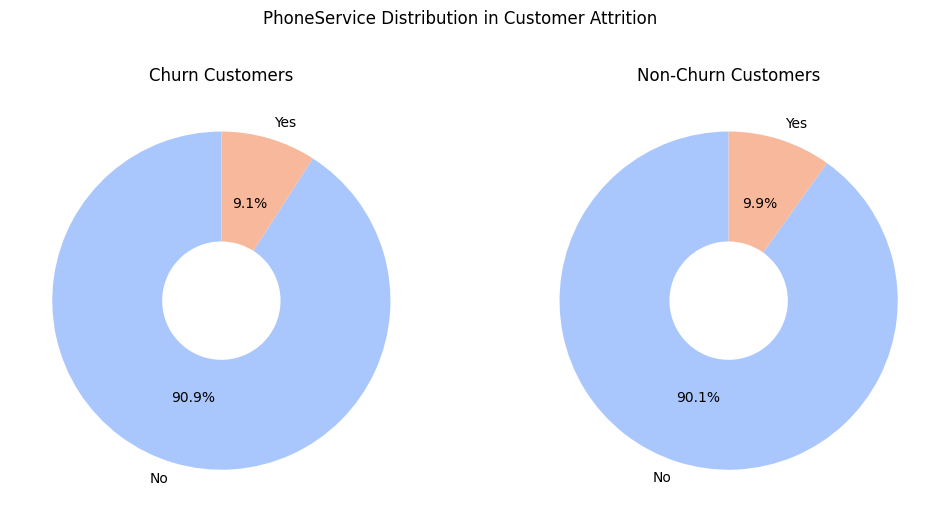

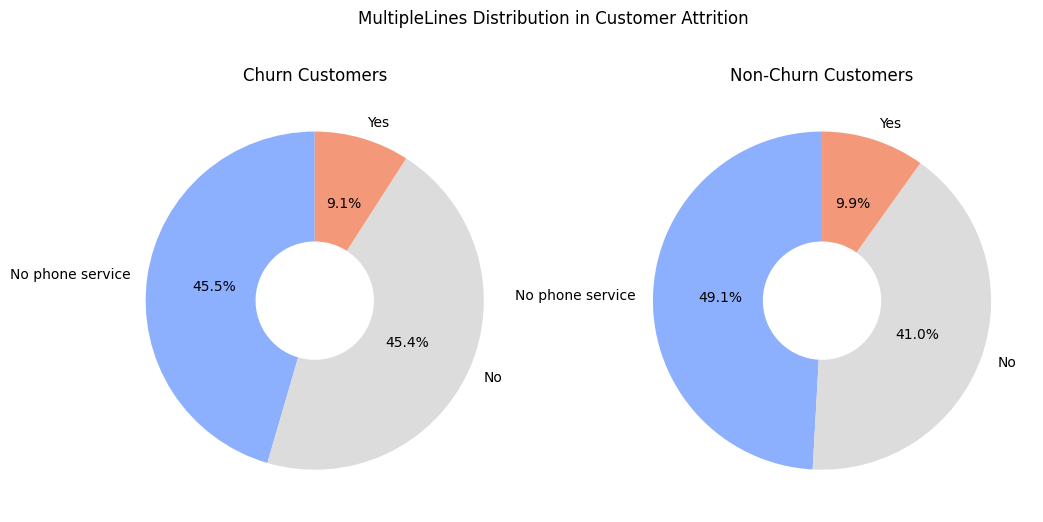

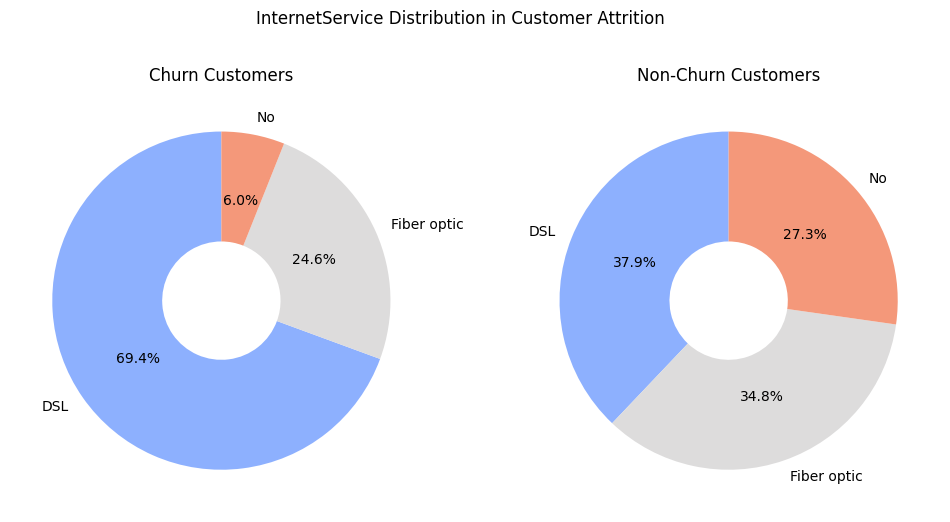

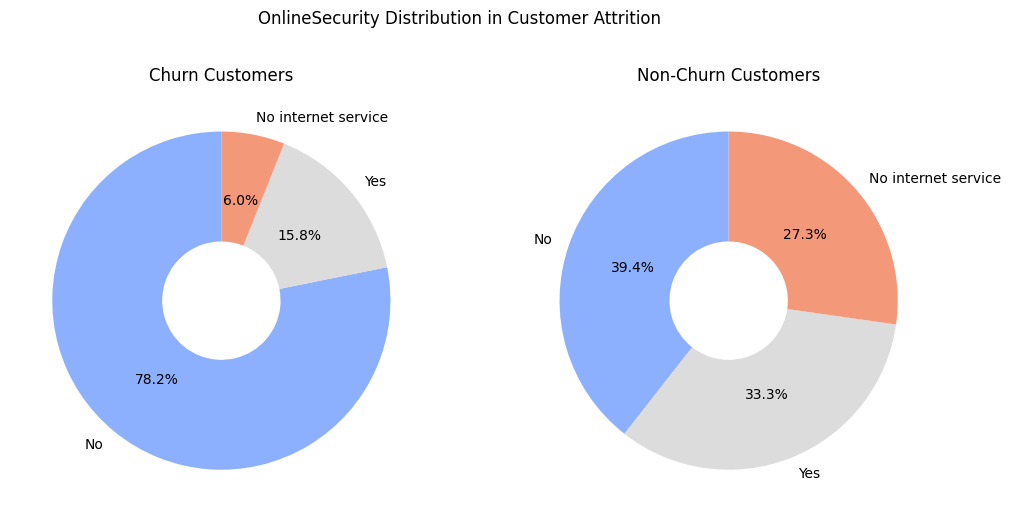

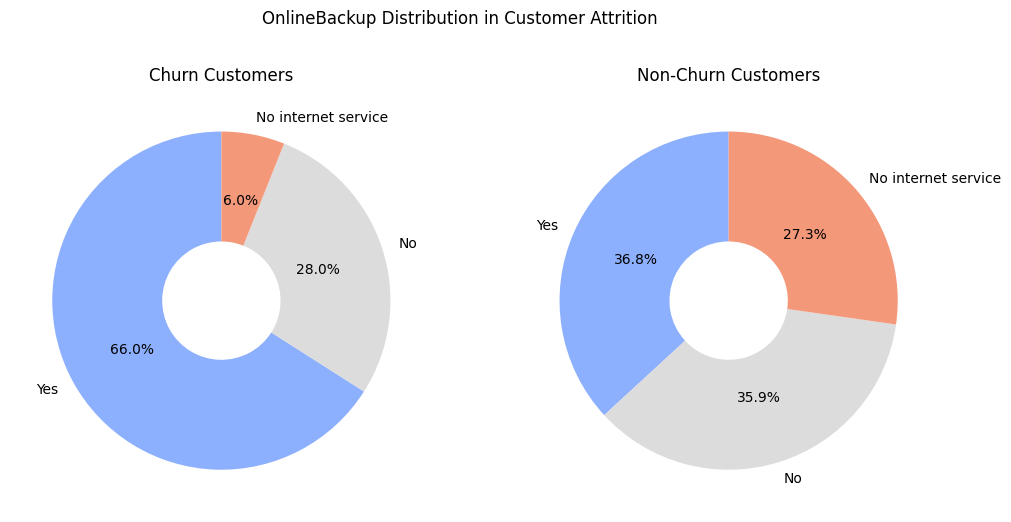

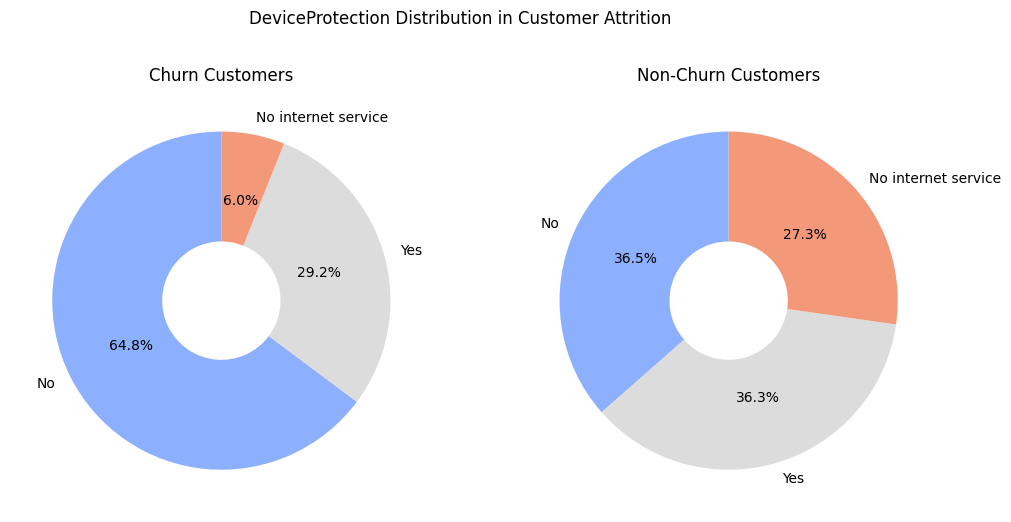

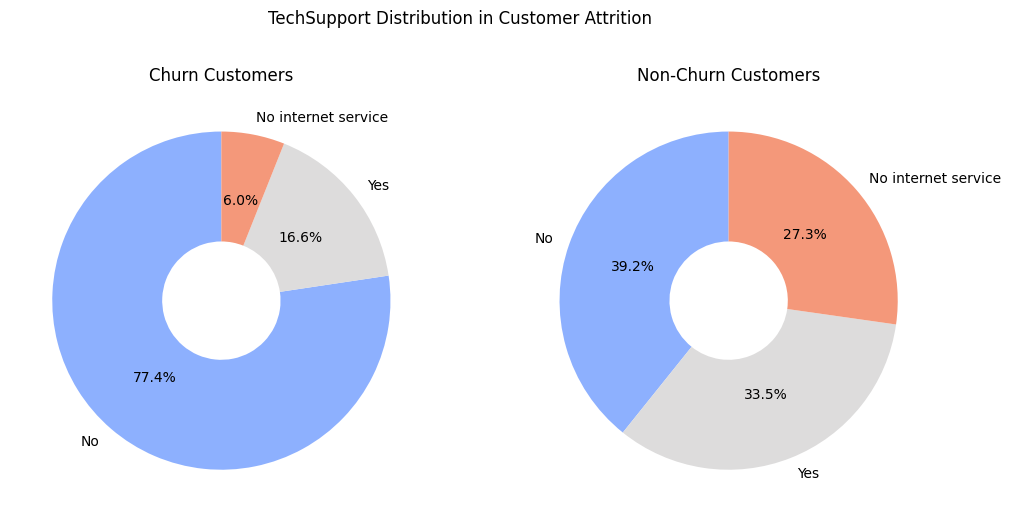

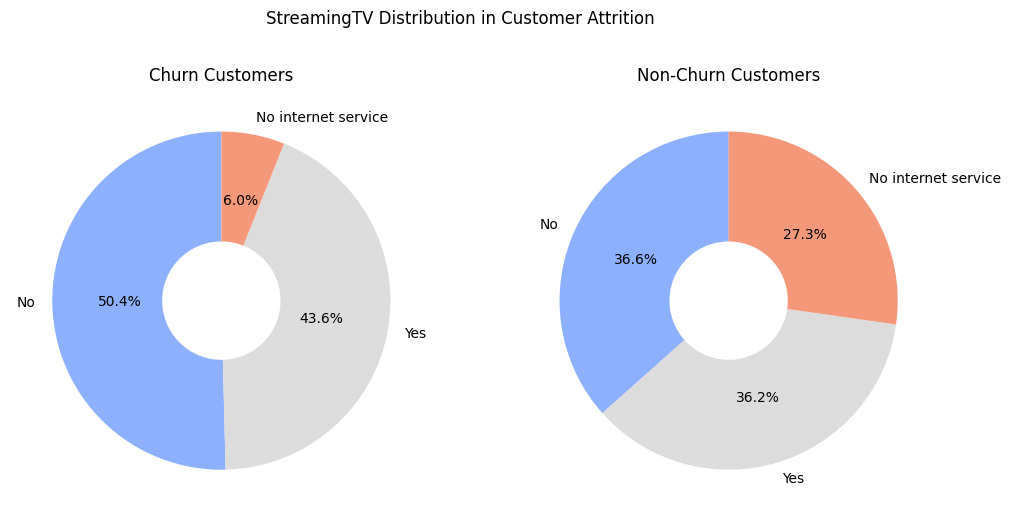

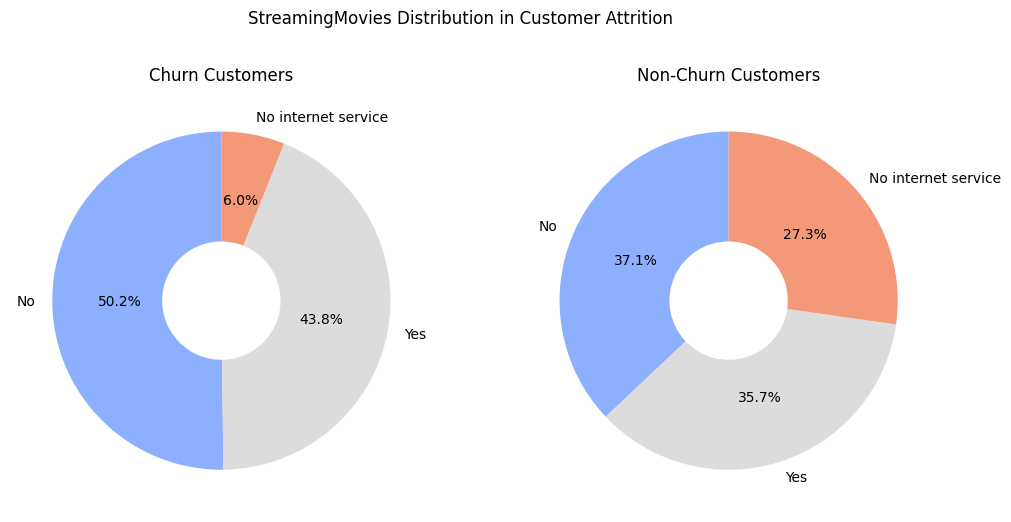

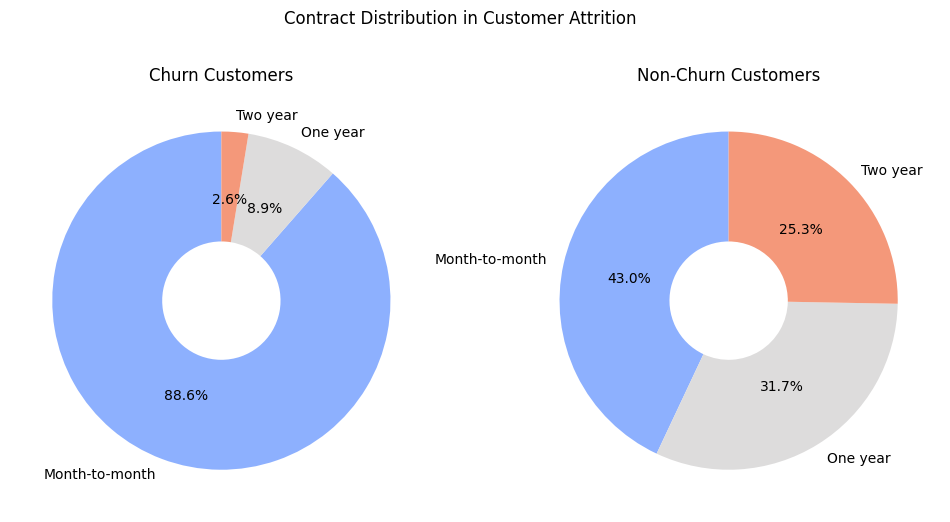

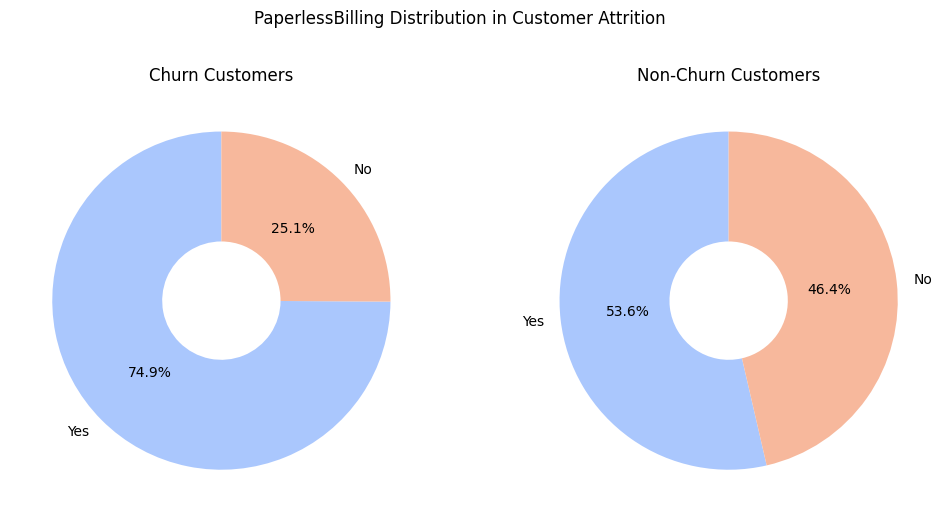

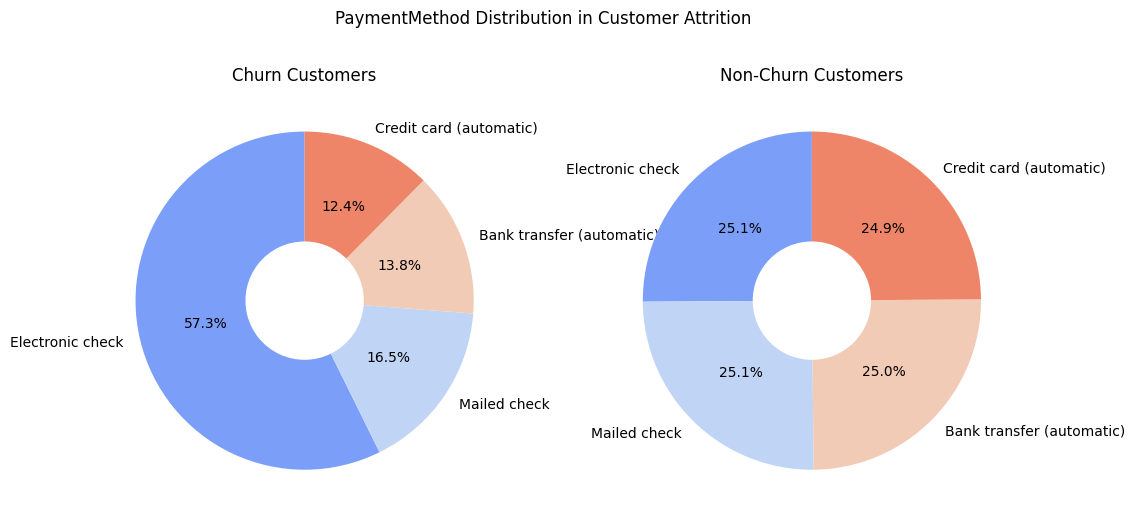

In [156]:
# 畫圓餅圖function

def plot_pie(column):
    # 計算流失客戶和非流失客戶中不同性別的計數
    churn_counts = df[df['Churn'] == 'Yes'][column].value_counts()
    non_churn_counts = df[df['Churn'] == 'No'][column].value_counts()

    # 設置顏色和標籤
    labels = df[column].unique()
    colors = sns.color_palette("coolwarm", len(labels))

    # 創建子圖
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # 繪製流失客戶的環形圖
    ax[0].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.65))
    ax[0].set_title('Churn Customers')

    # 繪製非流失客戶的環形圖
    ax[1].pie(non_churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.65))
    ax[1].set_title('Non-Churn Customers')

    # 設置標題 
    plt.suptitle(column + ' Distribution in Customer Attrition')

for col in df.columns:
    if col not in ['Churn', 'customerID', 'TotalCharges', 'tenure', 'MonthlyCharges']:
        plot_pie(col)

## 數值型態分布

相較於非數值型態的欄位用圓餅圖來看佔比，連續的數據較適合看他們的數據分布情況

In [157]:
# 畫直方圖 function
def plot_hist(column):
    print(f"Processing {column}")
   
    churn_dist = df[df['Churn'] == 'Yes'][column].value_counts(normalize=True).sort_index() * 100
    non_churn_dist = df[df['Churn'] == 'No'][column].value_counts(normalize=True).sort_index() * 100

    # 將計算結果放入 DataFrame 中
    column_dist_df = pd.DataFrame({
        'Value': churn_dist.index,
        'Churn Customers': churn_dist.values,
        'Non-Churn Customers': non_churn_dist.values
    })

    # 將數據轉換為長格式以便用 Seaborn 繪圖
    column_dist_long = pd.melt(column_dist_df, id_vars='Value', value_vars=['Churn Customers', 'Non-Churn Customers'], 
                            var_name='Customer Type', value_name='Percent')

    # 繪製條形圖
    plt.figure(figsize=(18, 6))
    sns.barplot(data=column_dist_long, x='Value', y='Percent', hue='Customer Type', palette='coolwarm')

    # 設置圖形標題和軸標籤
    plt.title(f'{column} Distribution in Customer Attrition')
    plt.xlabel(column)
    plt.ylabel('Percent')

Processing tenure


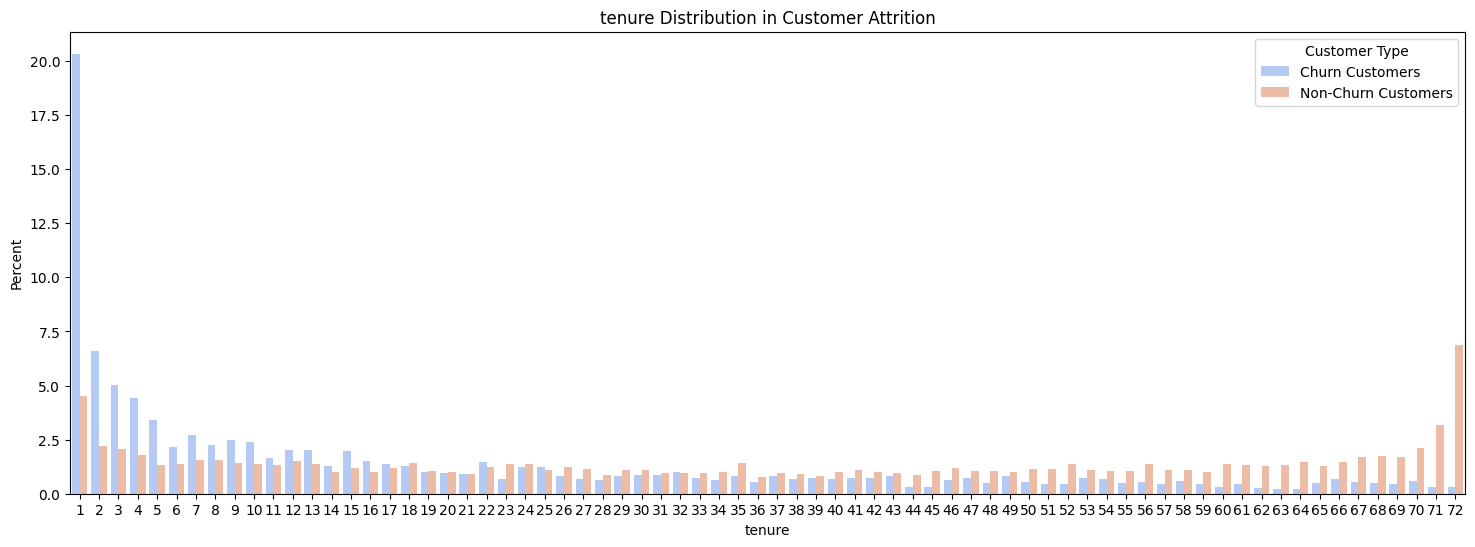

In [158]:
plot_hist('tenure')

# Conclusion

從以上資訊可以得知
- 男女流失比例差不多，顯示男女並非太大的影響關聯
- 有個有趣的現象，在流失的客戶中有 Partner 的人佔比竟然比較高，但是 Dependents 方面卻是沒有流失的部分佔比比較高，可能沒有伴侶會需要一直連繫其他人，或者浮動更換電信公司頻繁
- 相對的有了小孩也要一直跟小孩聯絡或者是會跟小孩選擇一樣的公司，部會輕易更動
- 數據也顯示跟電話服務沒有甚麼關係，反而是網路相關的服務影響較大
- 絕大多數的解約客戶都是使用 DSL 的網路服務，而且不使用網路的人佔比超少，可以說明可能對 DSL 服務不滿
- 大部分的解約客戶也都沒有使用 online security、device protection、 tech support、streaming tv、streaming movies 等等這些服務，可想得知他們不是為了使用這些功能才選擇此電信，對於這些服務沒有依賴性，所以也較容易成為流失客戶
- 從 tenure 的分布圖來看可以明顯發現使用時間越短，流失率則越高。很多才使用一個月而已，可能代表這些使用者可能是因為一些促銷之類的加入，可以思考如何將這些人轉換成長期客戶
- 從 churn & monthly charge 的 violin 圖來看，流失的客戶普遍都有較高的月費，以及合約的圓餅圖中可以發現，流失的客戶幾乎快9成都是按月續約的客戶，這也是其中一個關鍵，或許因為較短的合約有著較高的月費，大多數的客戶可能只是想要試用一下，並不打算簽長期合約，可以考慮改變計費方式以及合約綁定的方式來改善這問題
- 電子帳單這邊也蠻有趣的，無紙化計費的流失比例較高，但隨著科技的進步，這是在所難免的，而且再以支付方式來看，各項都蠻平均的，可以視為支付方式並不是客戶留存的關鍵，只是大多數流失的客戶都喜歡電子帳單以及電子支付，這樣或許也是導致他們變動較大的原因，方便取消合約以及支付
